#To Explore Business Analytics

In [ ]:
## Import all necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 13)

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

##Remove duplicates and null values

In [ ]:
df.duplicated().sum()

17

In [ ]:
df.drop_duplicates(keep='first',inplace=True)
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
##Correlation 
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


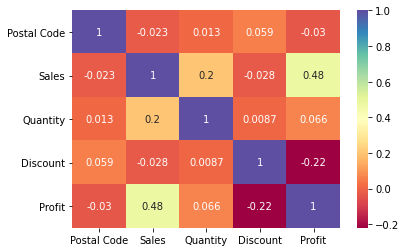

In [ ]:
sns.heatmap(df.corr(),cmap='Spectral',annot=True)
plt.show()

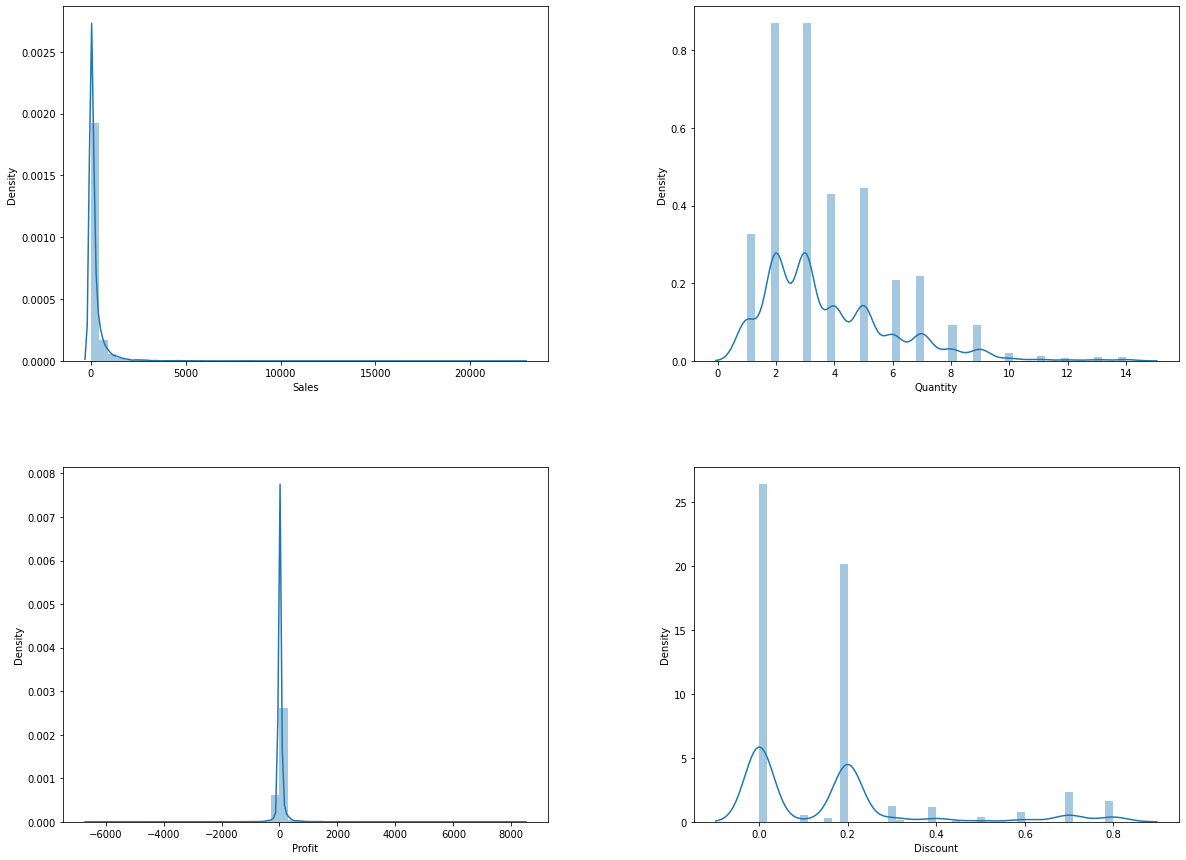

In [ ]:
##Distribution plot
fig=plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=.3,wspace=.3)
ax=fig.add_subplot(2,2,1)
sns.distplot(df['Sales'],ax=ax)
ax=fig.add_subplot(2,2,2)
sns.distplot(df['Quantity'],ax=ax)
ax=fig.add_subplot(2,2,3)
sns.distplot(df['Profit'],ax=ax)
ax=fig.add_subplot(2,2,4)
sns.distplot(df['Discount'],ax=ax)
plt.show()

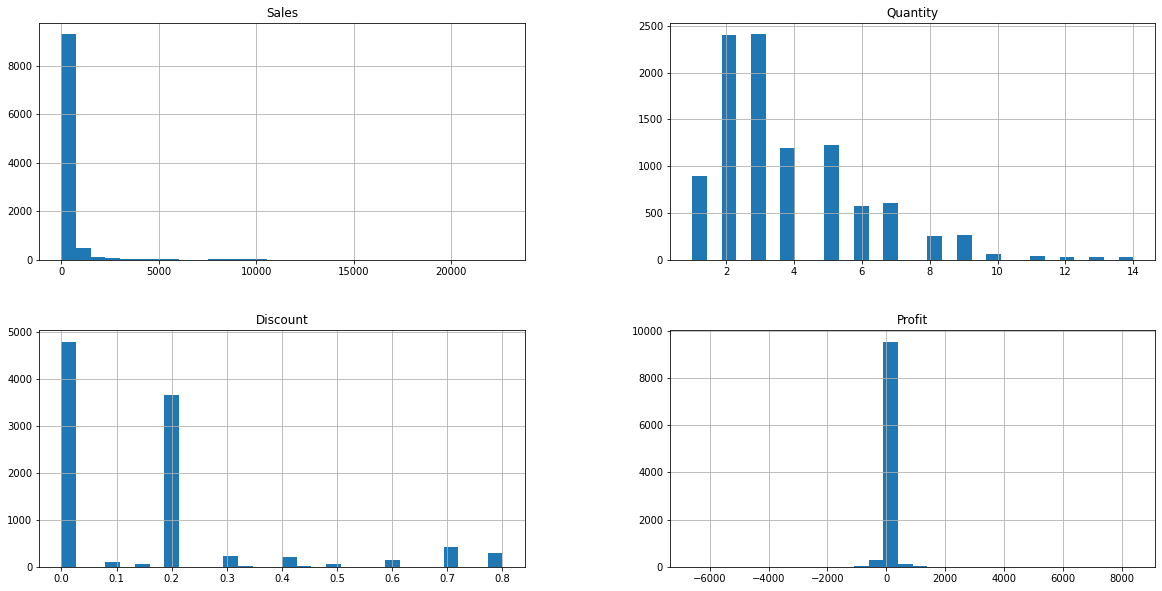

In [ ]:
##Histogram
df.hist(bins=30,figsize=(20,10))
plt.show()

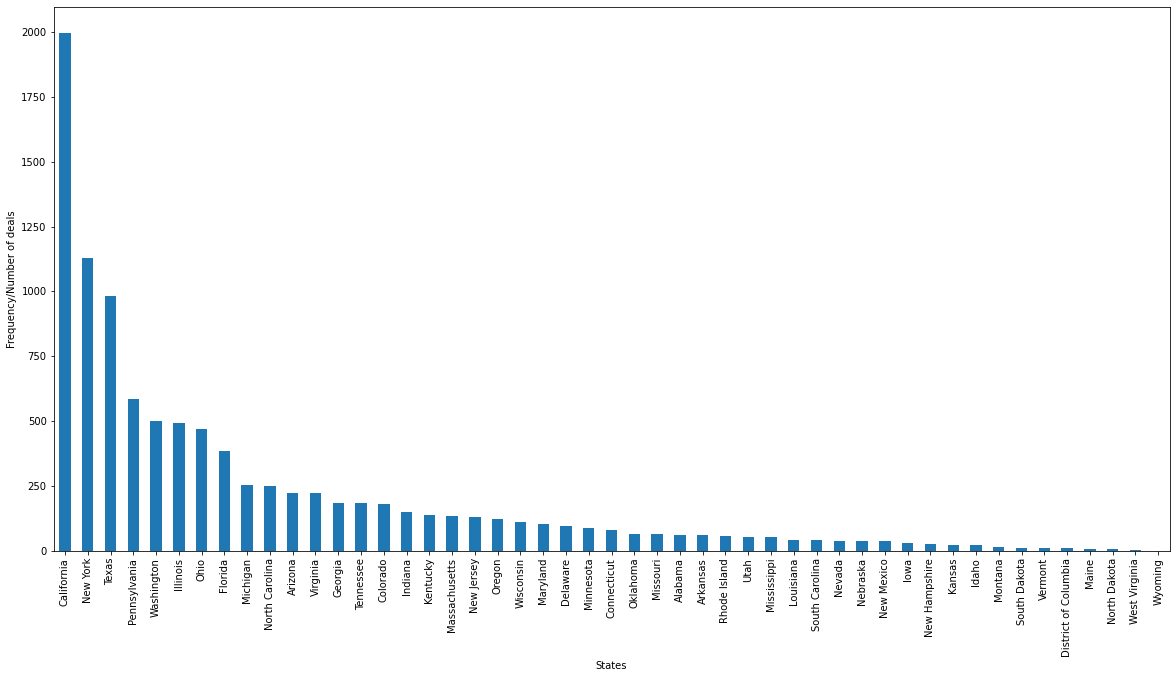

##From the histogram and distribution Graph we can say that our data is not normal

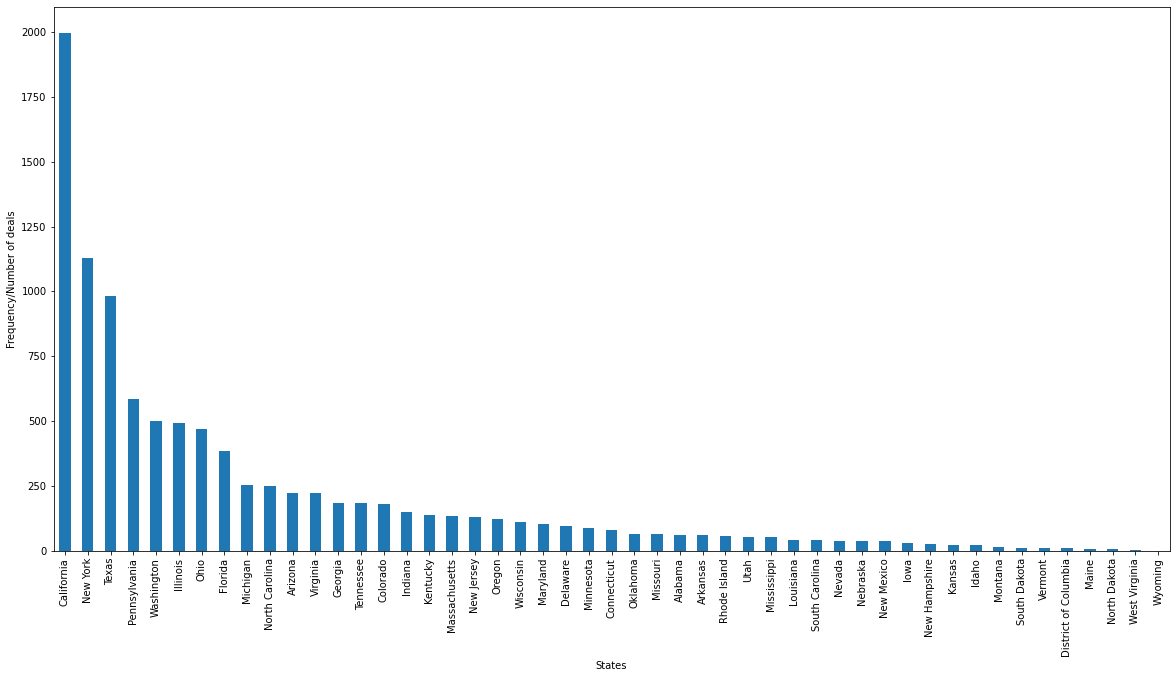

In [ ]:
df['State'].value_counts().plot(kind='bar',figsize=(20,10))
plt.ylabel('Frequency/Number of deals')
plt.xlabel('States')
plt.show()

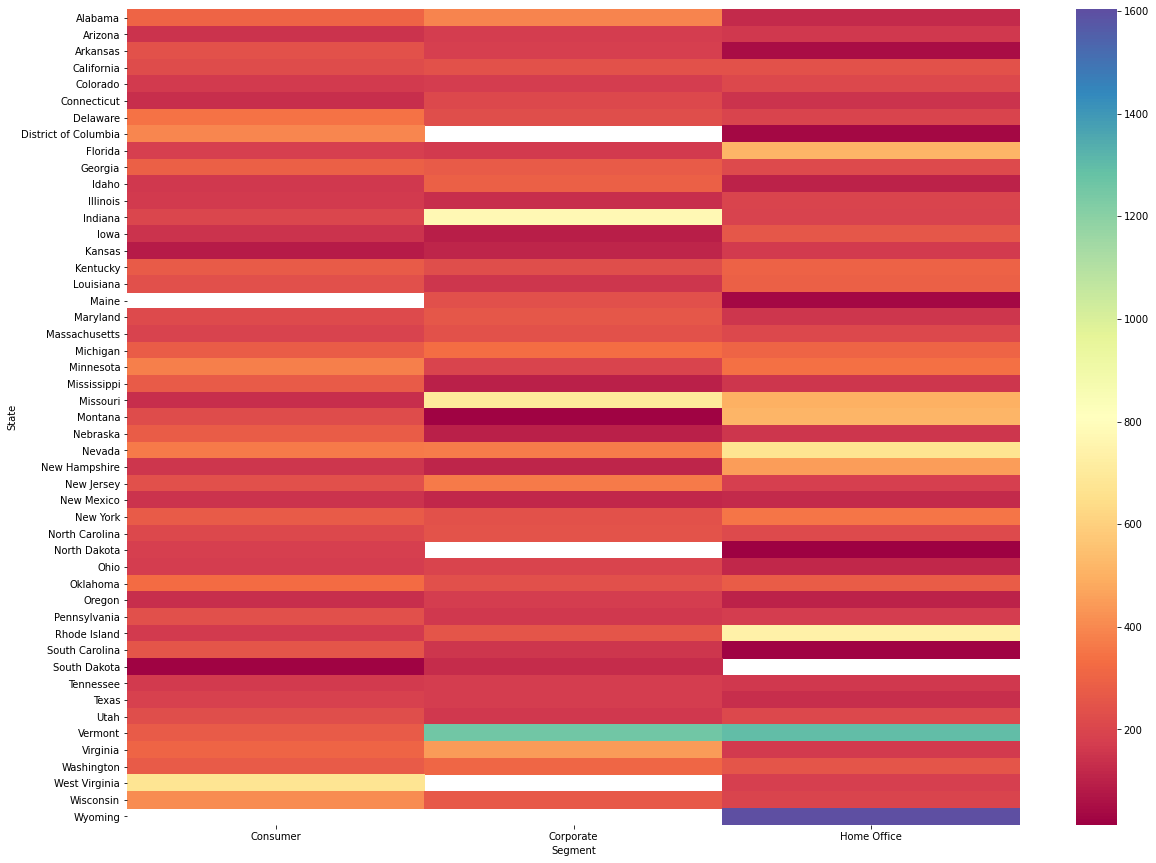

In [ ]:
heatmap_sales= pd.pivot_table(df,values='Sales',index=['State'],columns='Segment')
plt.figure(figsize=(20,15))
sns.heatmap(heatmap_sales,cmap='Spectral')
plt.show()

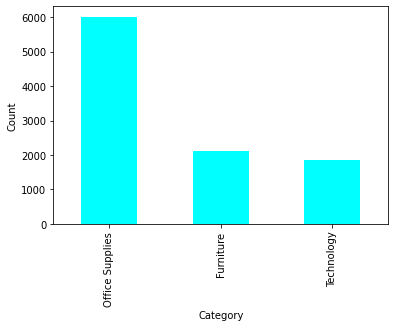

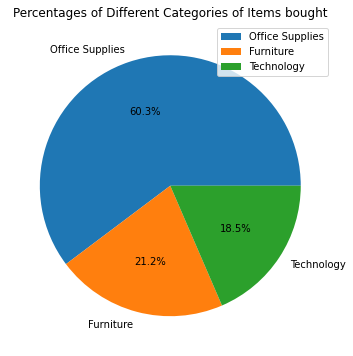

In [ ]:
df['Category'].value_counts().plot(kind='bar',color='cyan')
plt.xlabel('Category')
plt.ylabel('Count')
plt.figure(figsize=(6,6))
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentages of Different Categories of Items bought')
plt.legend()
plt.show()

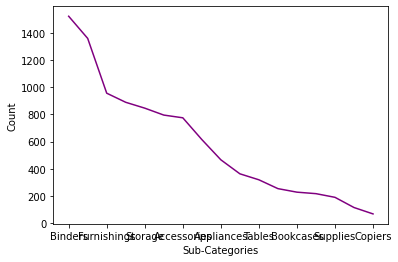

In [ ]:
df['Sub-Category'].value_counts().plot(kind='line',color='purple')
plt.xlabel('Sub-Categories')
plt.ylabel('Count')
plt.show()

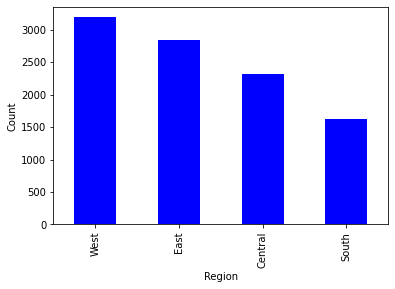

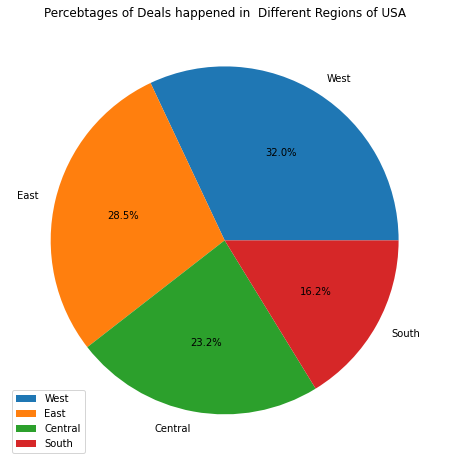

In [ ]:
df['Region'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('Region')
plt.ylabel('Count')
plt.figure(figsize=(8,8))
plt.pie(df['Region'].value_counts(),labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.title('Percebtages of Deals happened in  Different Regions of USA')
plt.legend()
plt.show()

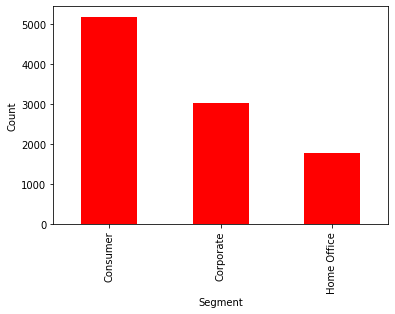

In [ ]:
df['Segment'].value_counts().plot(kind='bar',color='red')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

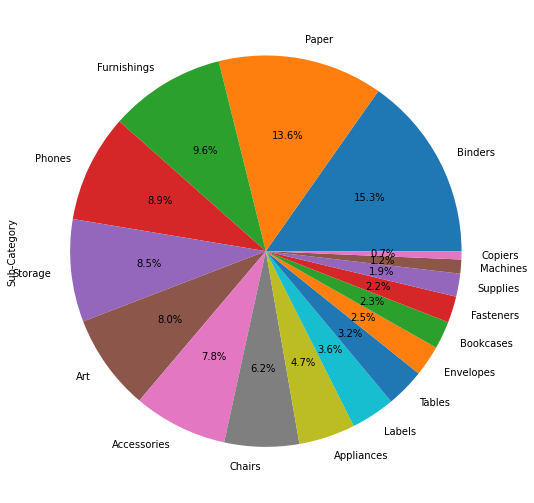

In [ ]:
##Different type of items bought
plt.figure(figsize=(14,9))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

##Cities with Maximum Profit

In [ ]:
top_cities=df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
top_cities

,City,Profit
329,New York City,62013.8973
266,Los Angeles,30431.4267
452,Seattle,29121.6825
438,San Francisco,17466.1186
123,Detroit,13146.6935
...,...,...
80,Chicago,-6648.3318
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10175.1755


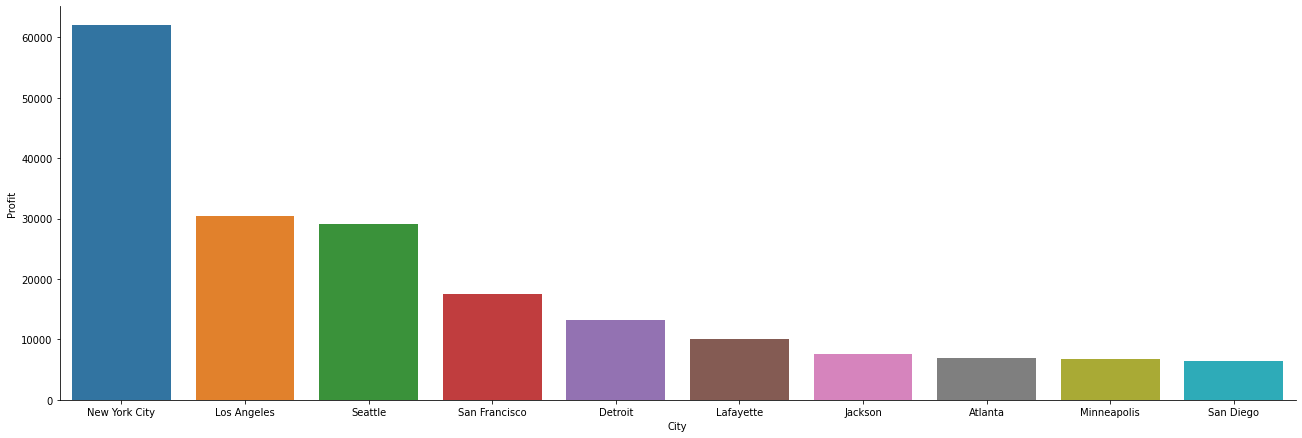

In [ ]:
sns.catplot('City','Profit',data=top_cities.head(10),kind='bar',height=6,aspect=3)
plt.show()

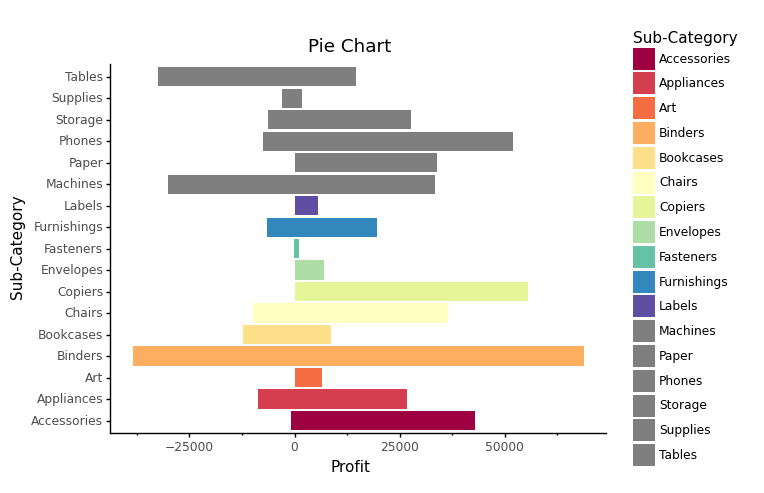

<ggplot: (-9223363292043062924)>

In [ ]:
Profit_plot = (ggplot(df, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

Above Pie chart Shows the profit and loss of each and every subcategories.Here from graph we can visualize that "binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories (For now we can't say that what is the reason it may be because of discounts given on binders subcategory).
Next,"Copiers" Sub-category has gain highest amount of profit with no loss.There are other sub-categories too who are not faced any kind of losses but their profit margins are also low.

Next,Suffering from highest loss is machines.

Text(0.5, 0.98, 'Pie Consumption Patterns in the United States')

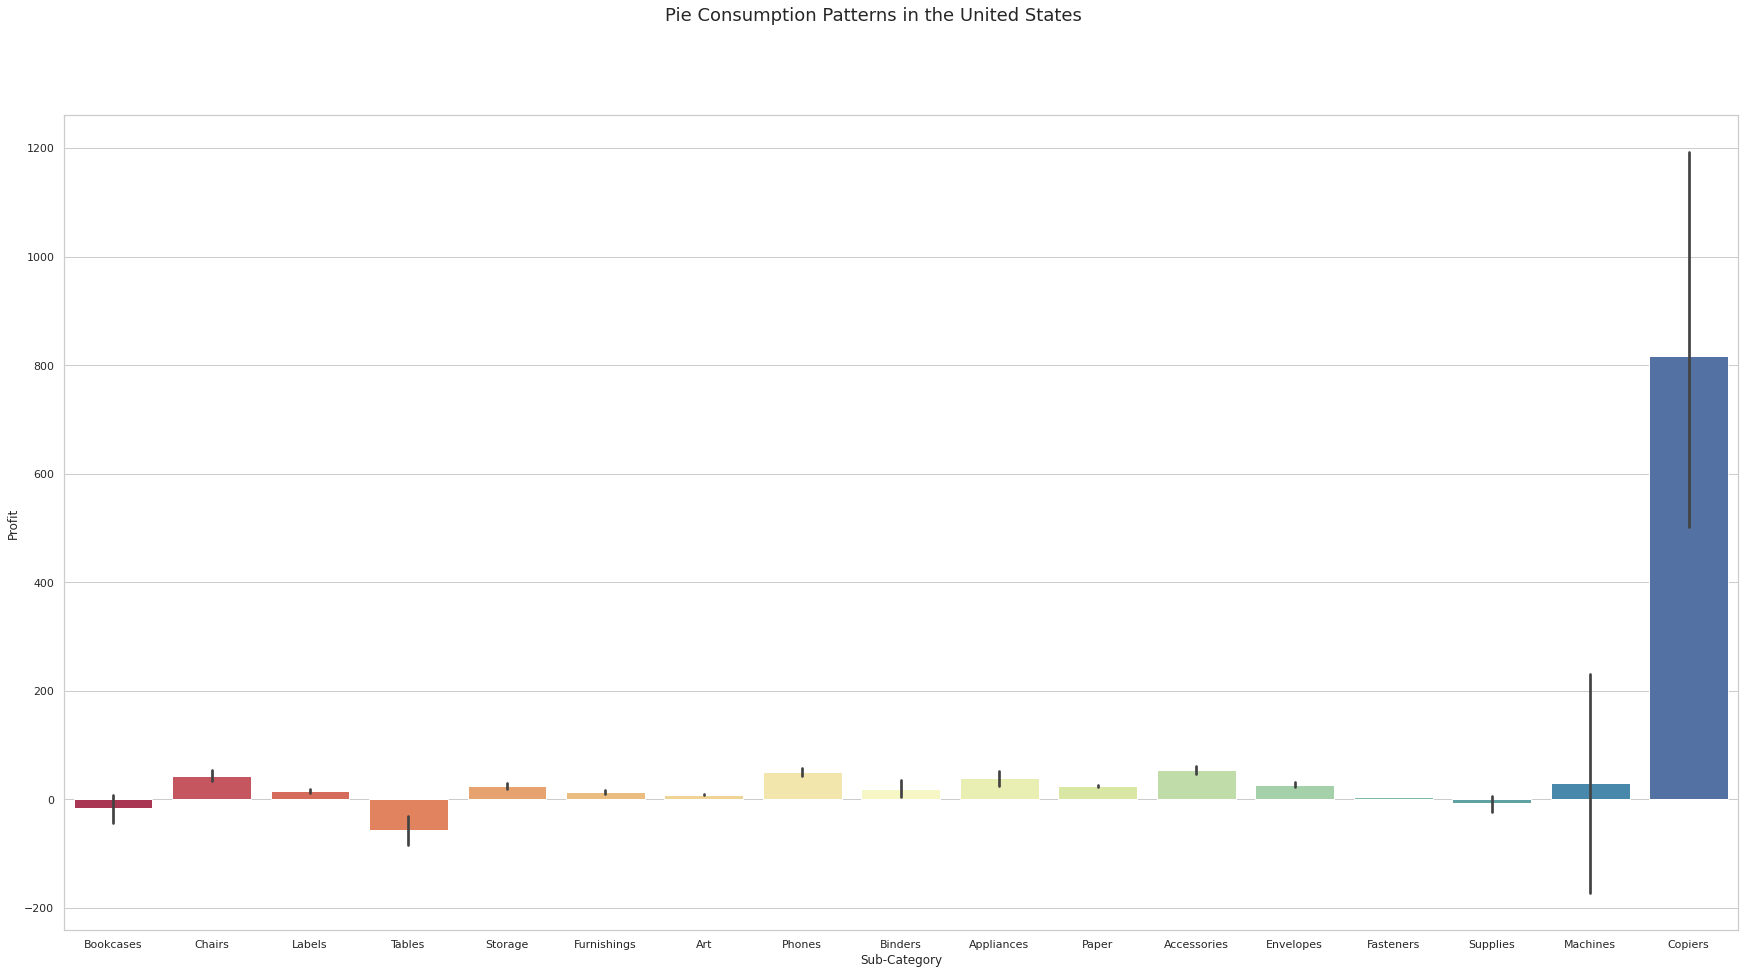

In [ ]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(30,15))

sns.barplot(x='Sub-Category',y='Profit', data=df, palette='Spectral')

plt.suptitle('Pie Consumption Patterns in the United States', fontsize=18)

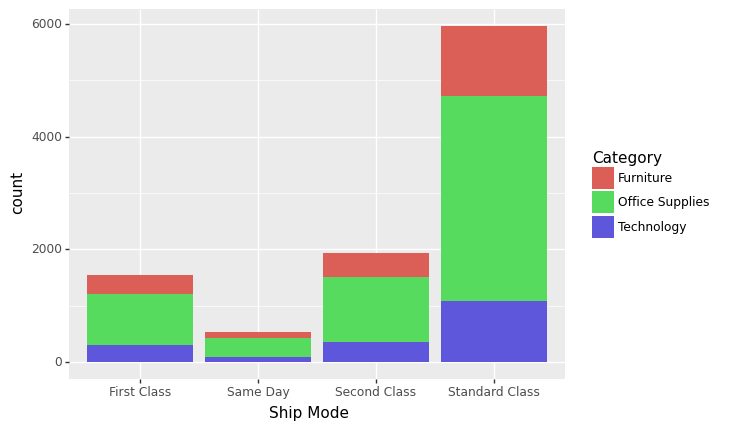

<ggplot: (-9223363292042230149)>

In [ ]:
ggplot(df, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

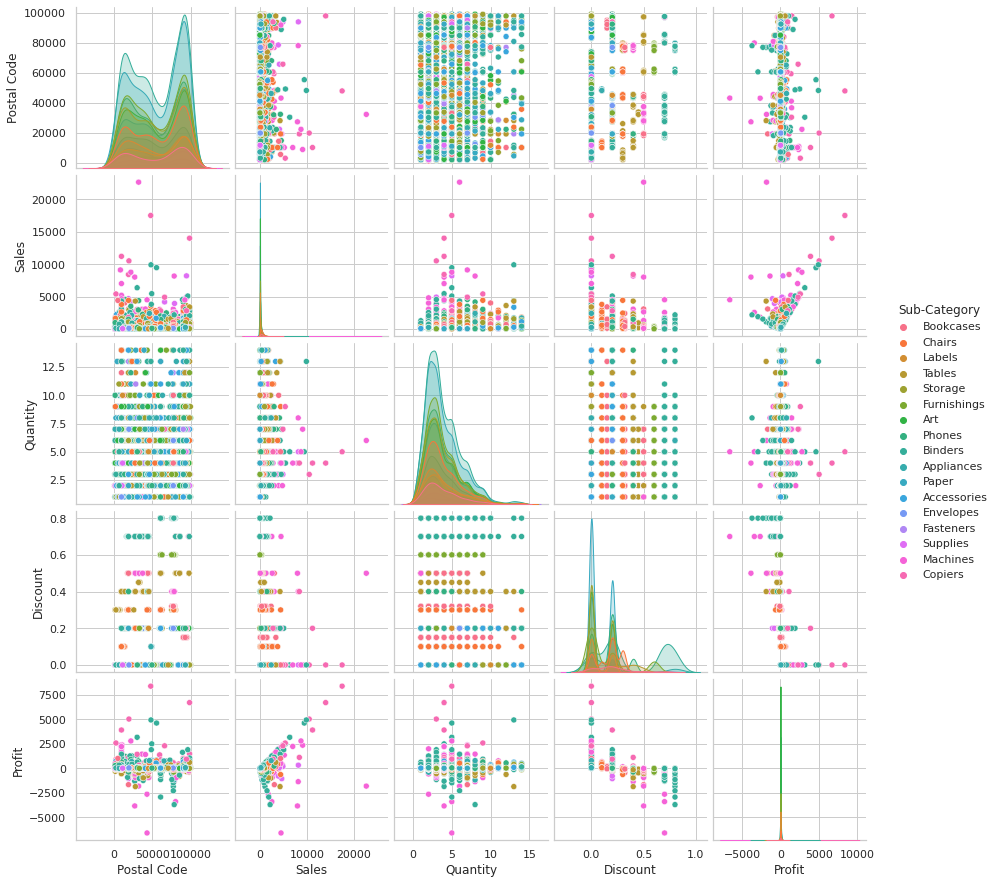

In [ ]:
figsize=(20,10)
sns.pairplot(df,hue='Sub-Category')

From the above plot we observe that Our Data is not Normal and it has some amount of outliers too.

Let's explore more about these outliers by using boxplots.
1st we'll check Sales from Every Segments of Whole Data

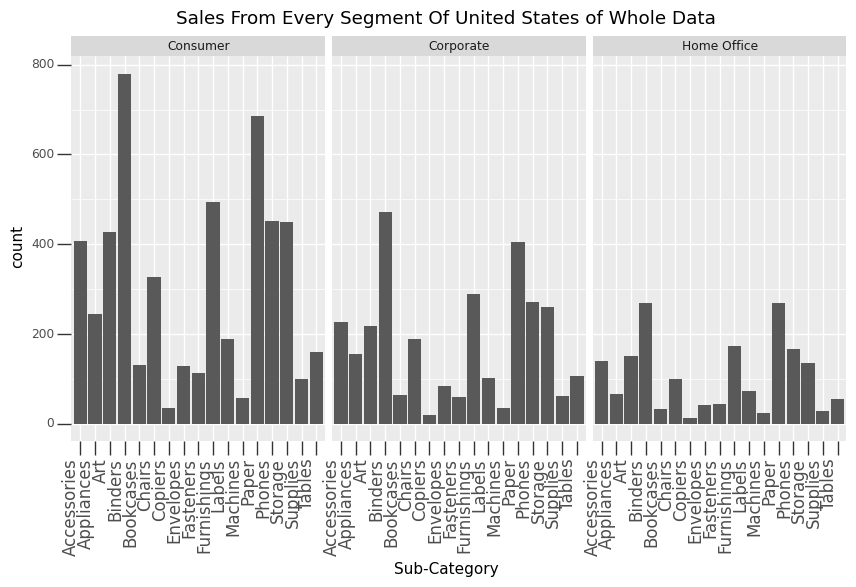

<ggplot: (8744809936574)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

From above Graph we can say that "Home Office" segment has less purchased Sub-Categories and in that "Supplies","Copiers","Machines","Envelopes","Bookcases","Fasteners","Tables" has the lowest Sales. "Consumer" has purchased more sub-categories as compared to other segments.

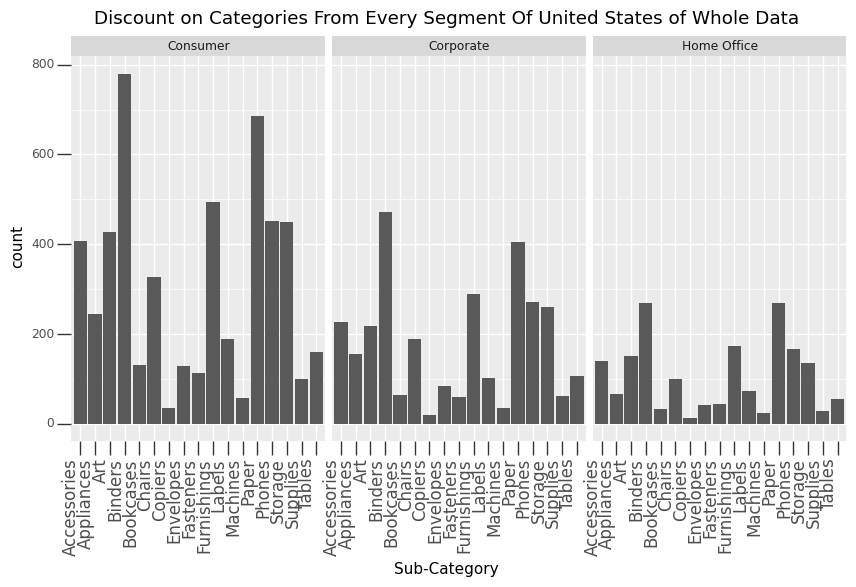

<ggplot: (8744810076136)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))


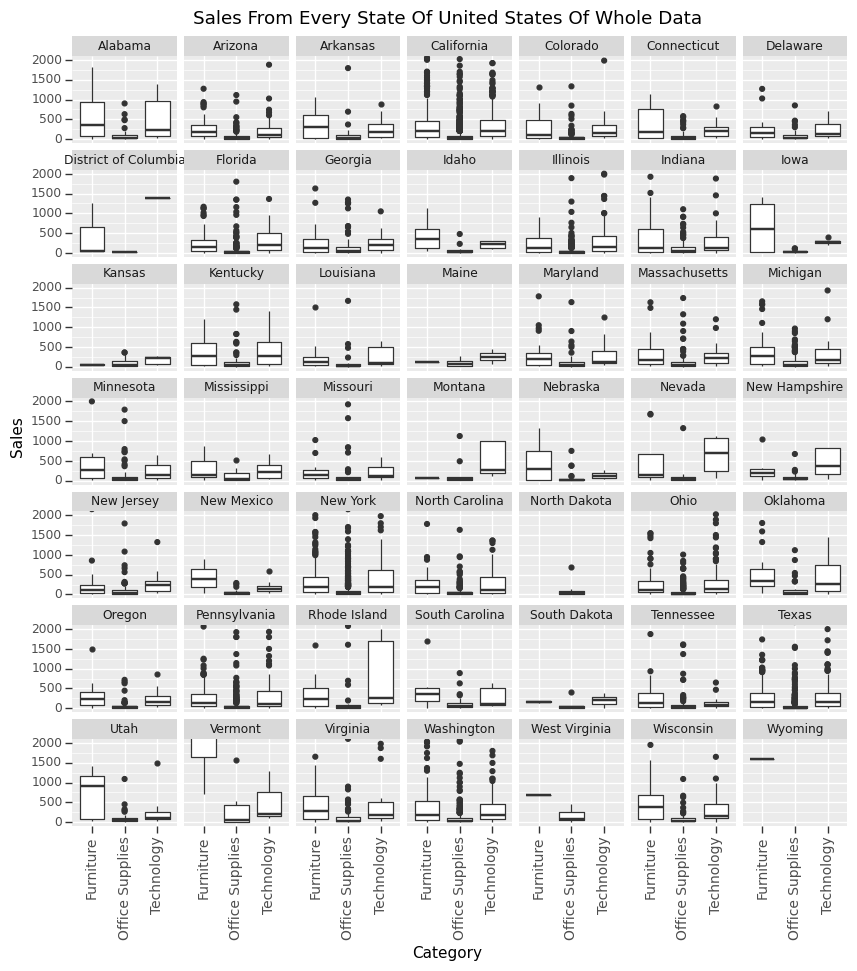

<ggplot: (8744812303424)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,
                     axis_ticks_length_minor=5)
(ggplot(df, aes(x='Category', y='Sales')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels + coord_cartesian(ylim = (0, 2000))+ggtitle("Sales From Every State Of United States Of Whole Data"))

In Above Box plot graph we have taken y-axis range from (0,2000) so that we can properly visualize that in which common price range sales happened and what is the price range of categories in different Cities and if the sales are high or low in different states of United States.

Here outlier means that price of some categories in different states has different higher prices. The sales was upto 20,000 but we have taken here small range so that visualize clearly about each states.

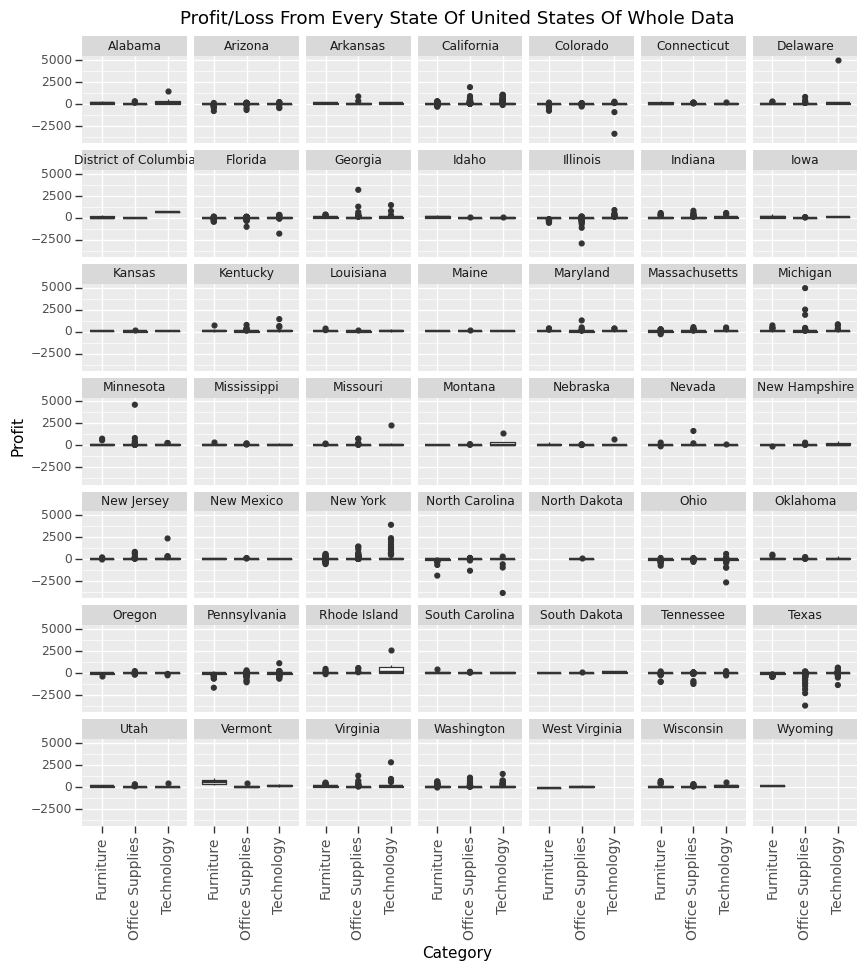

<ggplot: (8744809277900)>

In [ ]:
##Profit in every state
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Category', y='Profit')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+coord_cartesian(ylim = (-4000,5000))+ggtitle("Profit/Loss From Every State Of United States Of Whole Data"))

From above graph we can see that in which states in which category company/organization has Profit and loss,highest loss is happend in "texas" states in "office suplies" category.

There were states who neither come in profit nor comes in loss range they are neutral ,states like "South Dakota","West Virginia","Wyoming","Maine",etc.

There are also some states who has no problem of loss,only profit has gained ,states like "Virginia","Washington","Newyork"(Newyork faced kinda loss in furniture Category but Thats ok if we compare it with profits.),same as "California",etc

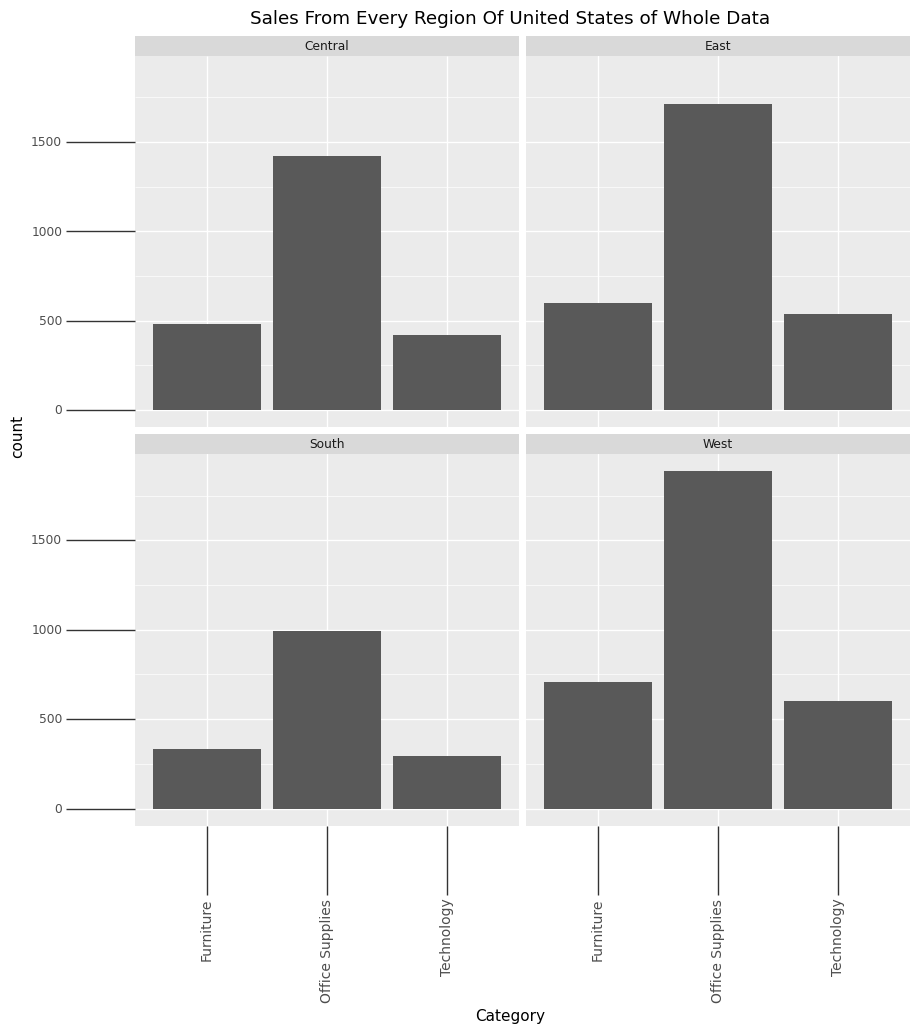

<ggplot: (-9223363292045850964)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(df, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

Above Graph shows the sales of categories in different Region of United States.From the Above Graph we can see that Sales of "Office supplies" are high in every Region compared to other Categories."Technology" and "Furniture" has very less sale in South Region compared to other regions of US.However,sales of "Technology" and "FUrniture" are less in other Regions too.

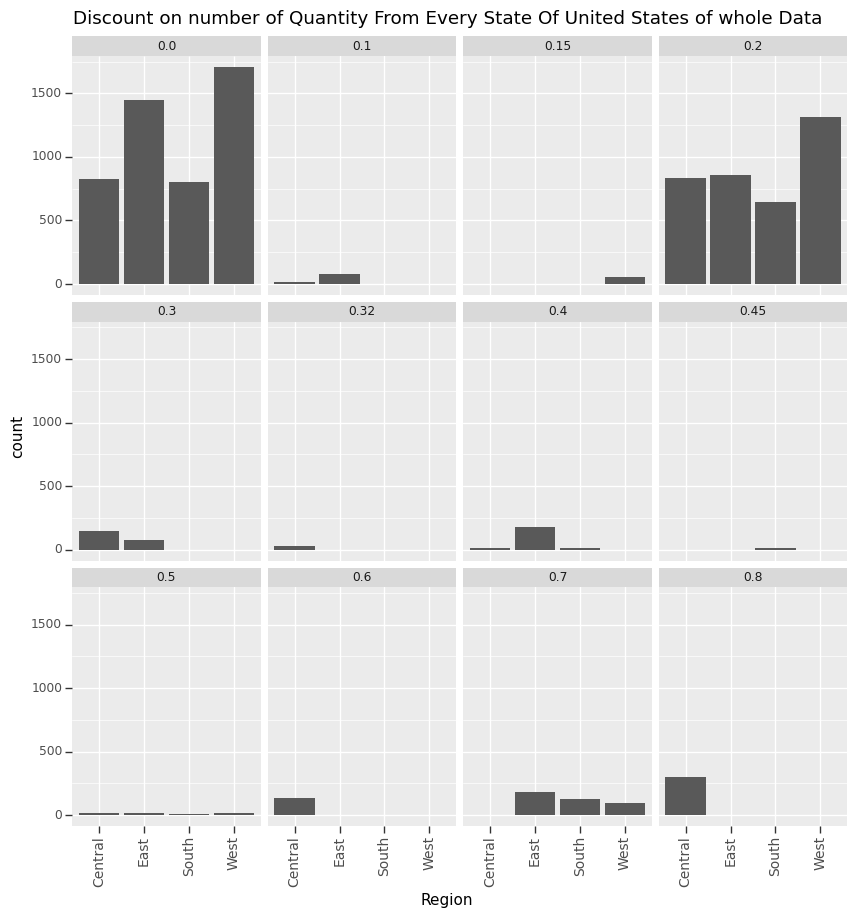

<ggplot: (-9223363292042597397)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Region', fill='Quantity')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Discount']) + flip_xlabels+ggtitle("Discount on number of Quantity From Every State Of United States of whole Data"))

From the Above Graph we can say that there were no discount on Higher number of quantity purchased on any region of US(may be their selling Price would be low). 0.2 Discount were given on Higher number of quantity purchased on any region of US.

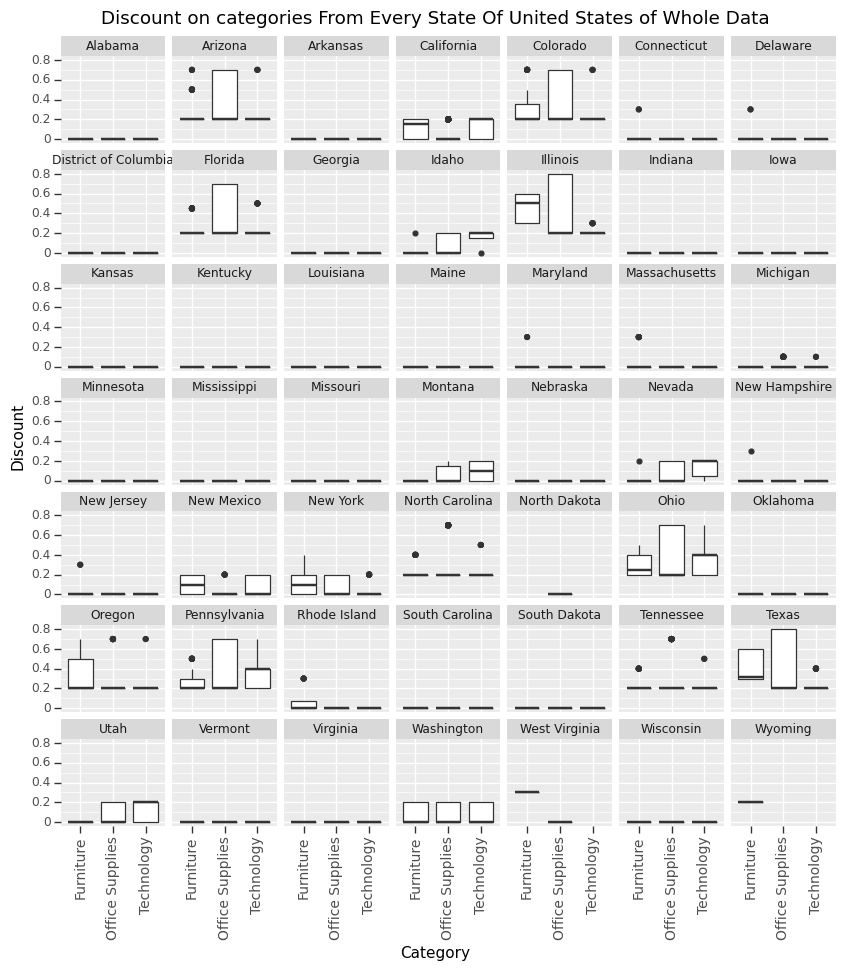

<ggplot: (-9223363292041926435)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Category', y='Discount')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Discount on categories From Every State Of United States of Whole Data"))

From the above Graph we can say that the most discount on categories is given some states i.e. "Texas","Oregon","Pennsylvania","Washinfton","Ohio","Newyork","Mexico","Utah" etc. there are also some states where no discounts were there on Categories like "Vermont","Virginia","Washington","West Virgenia" etc.

So Now we Grouped or sum the sales ,profit,discount,quantity according to every state of region and also according to sub-categories sales.

In [ ]:
grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


In [ ]:
### sum,mean,min,max,count median,standard deviation,Variance of each states of Profit
df.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76330.7891,38.241878,-325.5720,1906.4850,1996,13.33380,97.803399,9565.504848
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


From above Summary we can say that highest profit or loss sales has been done from which States,what is the varient profit is it high or low.What is the median Profit ,what is the Mean profit ,actually Mean will Give an Unbiased Result Compared to median Because Mean considered whole data in Calculation while Median is not.

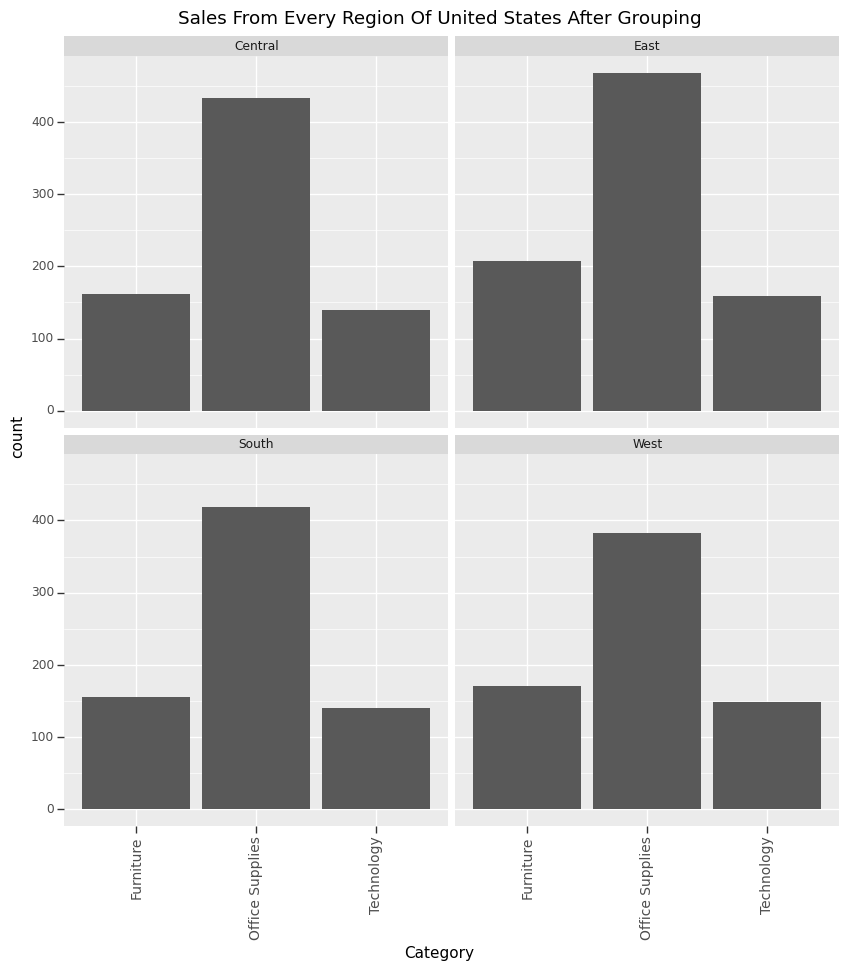

<ggplot: (-9223363292047216247)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
 + facet_wrap(['Region']) + flip_xlabels+ggtitle("Sales From Every Region Of United States After Grouping"))

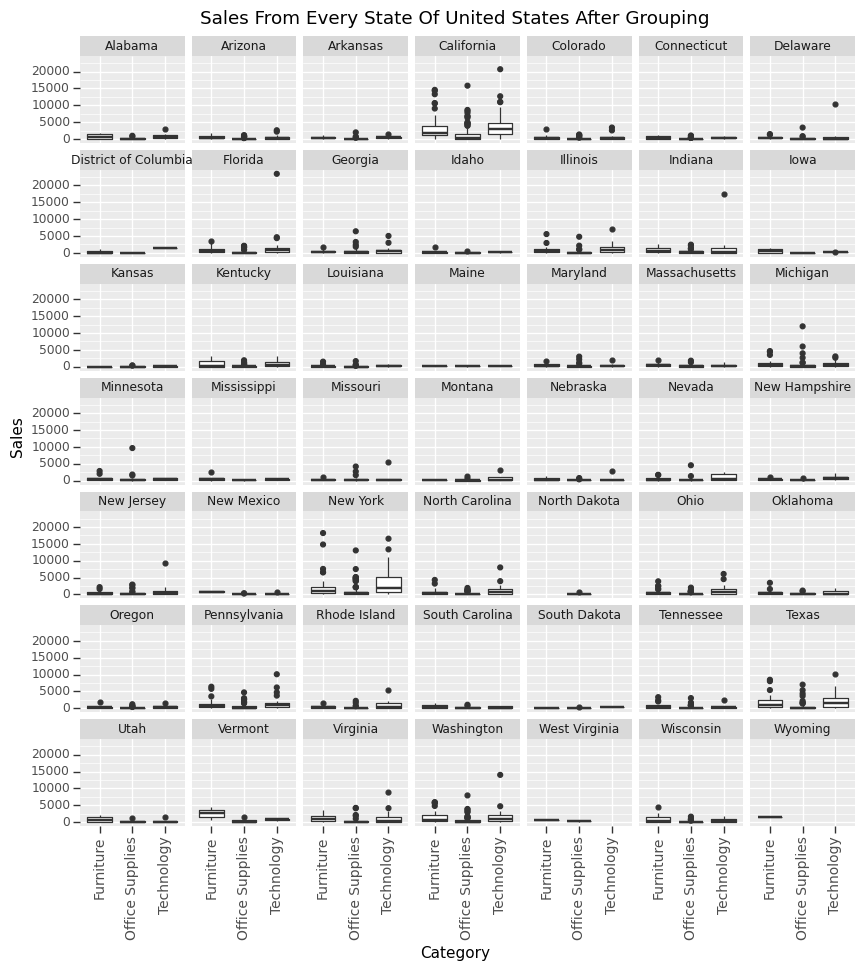

<ggplot: (8744808521094)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Sales')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Sales From Every State Of United States After Grouping"))

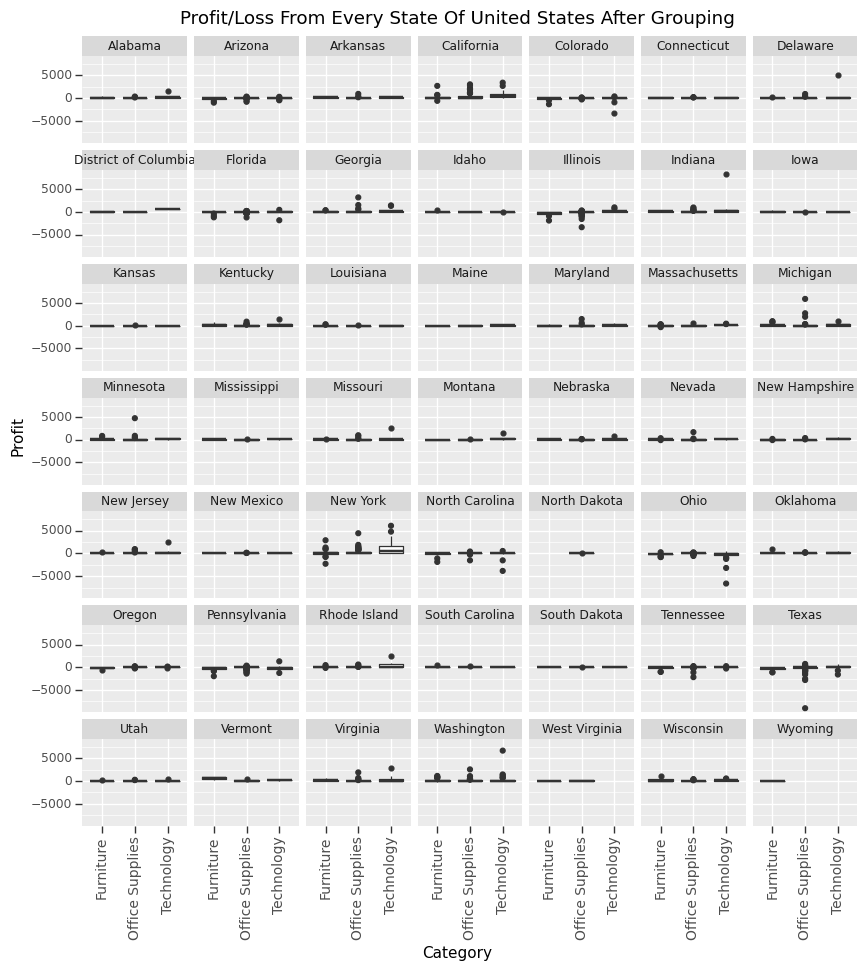

<ggplot: (-9223363292046408711)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Profit')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Profit/Loss From Every State Of United States After Grouping"))

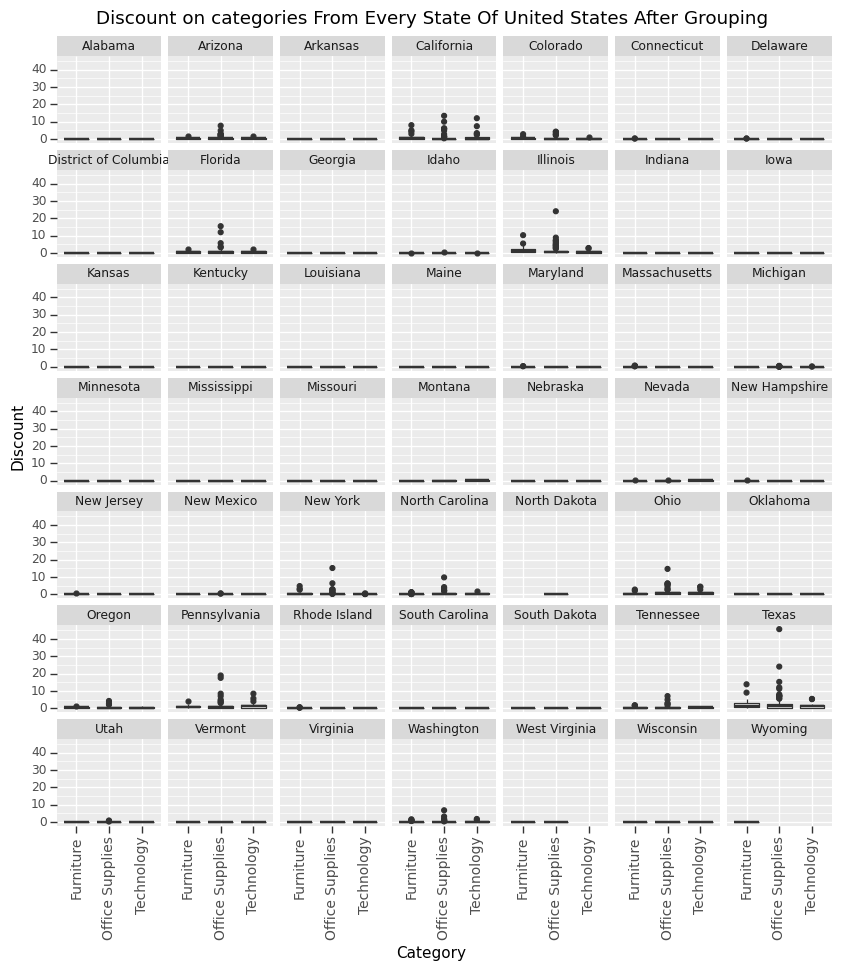

<ggplot: (-9223363292047009143)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Discount')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Discount on categories From Every State Of United States After Grouping"))

From Above Graph we can see that on an average "Texas","Pennsylvania","NewYork","Ohio","North Carolina","California","Florida","Illionis" these are the states where highest number of Discounts on different Categories has given. And in other states either there were no discounts on category or in very less number of Discounts are given.

## Cluster Analysis(K-Mean Clustering)

In [ ]:
x = df.iloc[:, [9, 10, 11, 12]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

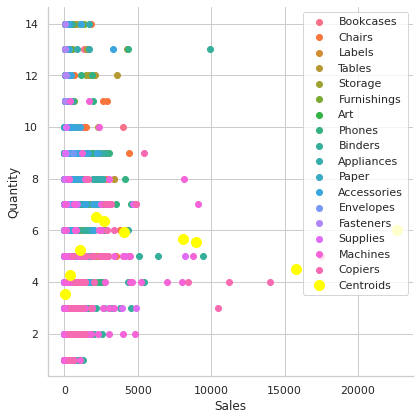

In [ ]:
sns.set_style("whitegrid") 
sns.FacetGrid(df, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

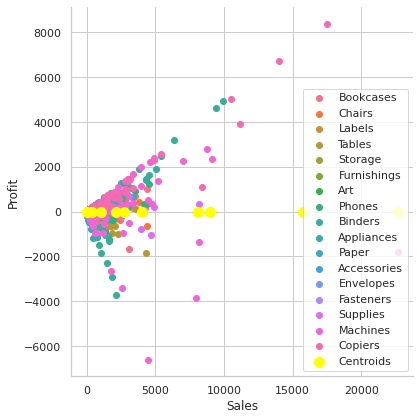

In [ ]:
sns.set_style("whitegrid") 
sns.FacetGrid(df, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Profit')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

###Interpretation

From the Above data Visualization and Clustering we can see that in Which states and in which Category Sales and profits are High or less,We can improve in that States By Providing Discounts in prefered Range so that Company and cosumer both will be in profit.So For Deciding that Range we have to do some Technical Analysis.One can Do it through Factor Analysis,or also can Do it throgh neural networks.